In [1]:
import pandas as pd
import numpy as n

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
url_rainfall = 'C:/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_rainfall_dataset.csv'
url_solar = 'C:/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_solar_dataset.csv'
url_temp = 'C:/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_max_temp_dataset.csv'
dataset_rainfall = pd.read_csv(url_rainfall)
dataset_solar = pd.read_csv(url_solar)
dataset_temp = pd.read_csv(url_temp)

In [4]:
dataset_temp.head()

,Variety,Reason,Year,Study,Location,ZS49PlHt,ZS49 (no days),HrvPlHt,ZS91 (no days),GrYld(kg/ha),...,03_temp_max,04_temp_max,05_temp_max,06_temp_max,07_temp_max,08_temp_max,09_temp_max,10_temp_max,11_temp_max,12_temp_max
0,Commander,AUS-CTL,2014,NtL,STHPER,55.0,92.0,72.0,131.0,NaN,...,30.293548,26.52,21.432258,19.616667,18.480645,21.587097,21.966667,24.512903,26.18,28.867742
1,Commander,AUS-CTL,2014,18Hrs,STHPER,38.0,63.0,55.0,108.0,NaN,...,30.293548,26.52,21.432258,19.616667,18.480645,21.587097,21.966667,24.512903,26.18,28.867742
2,Commander,AUS-CTL,2015,TOP1,NaN,NaN,104.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Commander,AUS-CTL,2015,TOP2,NaN,NaN,105.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Commander,AUS-CTL,2015,TOP3,NaN,NaN,96.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset_rainfall.drop(columns=['Variety', 'Year', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)
dataset_solar.drop(columns=[ 'Variety','Year', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)
dataset_temp.drop(columns=[ 'Variety', 'Year', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)

In [6]:
dataset_rainfall.drop(columns=['01_rainfall','02_rainfall','03_rainfall','10_rainfall','11_rainfall','12_rainfall'], inplace=True)
dataset_solar.drop(columns=['01_solar','02_solar','03_solar','10_solar','11_solar','12_solar'], inplace=True)
dataset_temp.drop(columns=['01_temp_max','02_temp_max','03_temp_max','10_temp_max','11_temp_max','12_temp_max'], inplace=True)

Dropped months - Jan, Feb, March, October, Nov, December

Months used - April, May, June, July, August, Sept  =  6 months

In [7]:
dataset_rainfall.dropna(inplace=True)
dataset_temp.dropna(inplace=True)
dataset_solar.dropna(inplace=True)

print("RainfallL: ", dataset_rainfall.shape)
print("Solar: ", dataset_solar.shape)
print("Temperature: ", dataset_temp.shape)

RainfallL:  (2617, 7)
Solar:  (2617, 7)
Temperature:  (2617, 7)


In [8]:
dataset_temp.head()

,GrYld(kg/ha),04_temp_max,05_temp_max,06_temp_max,07_temp_max,08_temp_max,09_temp_max
7,2410.5,28.040000,24.593548,23.313333,20.867742,21.029032,25.343333
8,4024.9,27.386667,23.361290,19.676667,18.916129,19.361290,20.436667
9,2360.5,21.900000,17.651613,17.480000,15.151613,15.870968,19.143333
10,3683.5,20.853333,17.383871,14.313333,13.574194,13.741935,15.083333
11,4060.0,22.460000,18.506452,18.443333,15.880645,17.390323,20.031034


In [9]:
dataset_rainfall.shape


(2617, 7)

In [10]:
dataset_rainfall.values.reshape(-1,6,1)
dataset_rainfall.shape

ValueError: cannot reshape array of size 18319 into shape (6,1)

In [11]:
common_columns = dataset_rainfall.columns.intersection(dataset_solar.columns).intersection(dataset_temp.columns)

merged_df = pd.concat([
    dataset_rainfall,
    dataset_solar.drop(columns=common_columns),
    dataset_temp.drop(columns=common_columns)
], axis=1)

In [12]:
merged_df.shape

(2617, 19)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()

X = merged_df.drop(columns= ['GrYld(kg/ha)'])
y = merged_df['GrYld(kg/ha)']

scaled_X = scaler_data.fit_transform(X)

In [14]:
print(X.shape)
print(y.shape)

(2617, 18)
(2617,)


In [15]:
import numpy as np

X_reshaped = np.array(X).reshape((X.shape[0], X.shape[1], 1))

print(X_reshaped.shape)

y = merged_df['GrYld(kg/ha)'].values

print(y.shape)



(2617, 18, 1)
(2617,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size =0.2, random_state=42)

print(f"X Train : {len(X_train)}, Test: {len(X_test)}, Y Train: {len(y_train)}, Target Test: {len(y_test)}")


X Train : 2093, Test: 524, Y Train: 2093, Target Test: 524


In [17]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class MultiInputAttention(Layer):
    def __init__(self, **kwargs):
        super(MultiInputAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Creates a learnable parameter (weights) for the attention mechanism
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros", trainable=True)
        super(MultiInputAttention, self).build(input_shape)

    def call(self, x):
        # Alignment scores: W*x + b
        e = K.tanh(K.dot(x, self.W) + self.b)
        
        # Softmax to get the attention weights (importance of each timestep)
        a = K.softmax(e, axis=1)
        
        # Multiply the attention weights with the hidden states
        output = x * a
        
        # Return the context vector (weighted sum of hidden states)
        return K.sum(output, axis=1), a


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layer
lstm_out = LSTM(50, return_sequences=True)(inputs)  

# Attention layer
attention_output, attention_weights = MultiInputAttention()(lstm_out)

# Dense layers
dense = Dense(128, activation='relu') (attention_output)
dense = Dropout(0.1080875117110648)(dense)

output = Dense(1, activation='relu') (dense)

# Build the model
model = Model(inputs=[inputs], outputs=[output, attention_weights])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError(), 'mae'])

model.compile(
    optimizer='adam', 
    loss=['mse', None],  # Only compute loss for the main output
    loss_weights=[1., 0.],  # Gives full weight to the main output, ignores the attention output
    metrics=[RootMeanSquaredError(), 'mae']  
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 18, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_input_attention           │ [(None, 50), (None,    │            68 │
│ (MultiInputAttention)           │ 18, 1)]                │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,125 (66.89 KB)

 Trainable params: 17,125 (66.89 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
X_reshaped.shape

(2617, 18, 1)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(
    X_train, 
    [y_train, np.zeros((len(y_train), X_train.shape[1]))],  # Dummy target for attention weights
    epochs=100, 
    batch_size=16,
    validation_split=0.2, 
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - dense_1_root_mean_squared_error: 2966.3962 - loss: 8808426.0000 - multi_input_attention_mae: 0.0556 - val_dense_1_root_mean_squared_error: 2848.9119 - val_loss: 8116299.0000 - val_multi_input_attention_mae: 0.0556
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - dense_1_root_mean_squared_error: 2820.9421 - loss: 7960882.5000 - multi_input_attention_mae: 0.0556 - val_dense_1_root_mean_squared_error: 2626.6245 - val_loss: 6899156.0000 - val_multi_input_attention_mae: 0.0556
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - dense_1_root_mean_squared_error: 2554.2776 - loss: 6527662.0000 - multi_input_attention_mae: 0.0556 - val_dense_1_root_mean_squared_error: 2303.1392 - val_loss: 5304450.5000 - val_multi_input_attention_mae: 0.0556
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - dense_1_root_mean_squared_error: 2214.7603 - loss: 4909114.0000 - multi_input_attention_mae: 0.0556 - val_dense_1_root_mean_squared_er

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred, _ = model.predict(X_train)  # Unpack the two outputs

# Reshape y_pred to match y_train
y_pred = y_pred.reshape(-1)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("MSE Train:", mse)
print("MAE Train:", mae)
print("RMSE Train:", rmse)
print("R2 Score Train:", r2)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
MSE Train: 840043.1091017735
MAE Train: 719.386512706044
RMSE Train: 916.5386566325359
R2 Score Train: 0.32705422313477783


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred, _ = model.predict(X_test)

# Reshape y_pred to match y_train
y_pred = y_pred.reshape(-1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Test): {mse:.4f}")
print(f"MAE (Test): {mae:4f}")
print(f"RMSE (Test): {rmse:.4f}")
print("R2 Score Train:", r2)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE (Test): 855134.9381
MAE (Test): 724.247913
RMSE (Test): 924.7351
R2 Score Train: 0.28534142856531064


In [23]:
column_names = merged_df.columns.tolist()
if len(column_names) > 0:
    column_names.pop(0)
print(column_names)


['04_rainfall', '05_rainfall', '06_rainfall', '07_rainfall', '08_rainfall', '09_rainfall', '04_solar', '05_solar', '06_solar', '07_solar', '08_solar', '09_solar', '04_temp_max', '05_temp_max', '06_temp_max', '07_temp_max', '08_temp_max', '09_temp_max']


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


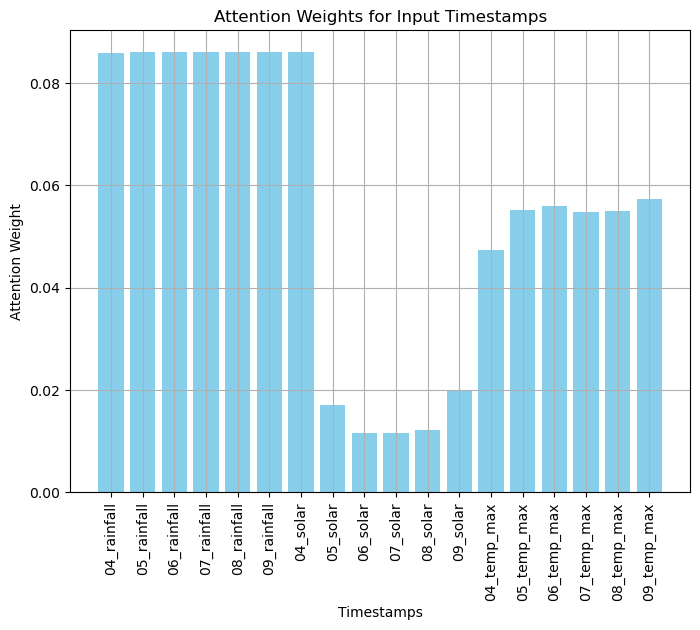

In [ ]:
# Get predictions and attention weights for the test set
predictions, attention_weights = model.predict(X_test)

# Visualize attention weights for a specific test instance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(len(column_names)), attention_weights[0].reshape(-1), color='skyblue')
plt.xticks(ticks=range(len(column_names)), labels=column_names, rotation=90)
plt.xlabel('Timestamps')
plt.ylabel('Attention Weight')
plt.title('Attention Weights for Input Timestamps')
plt.grid(True)
plt.show()


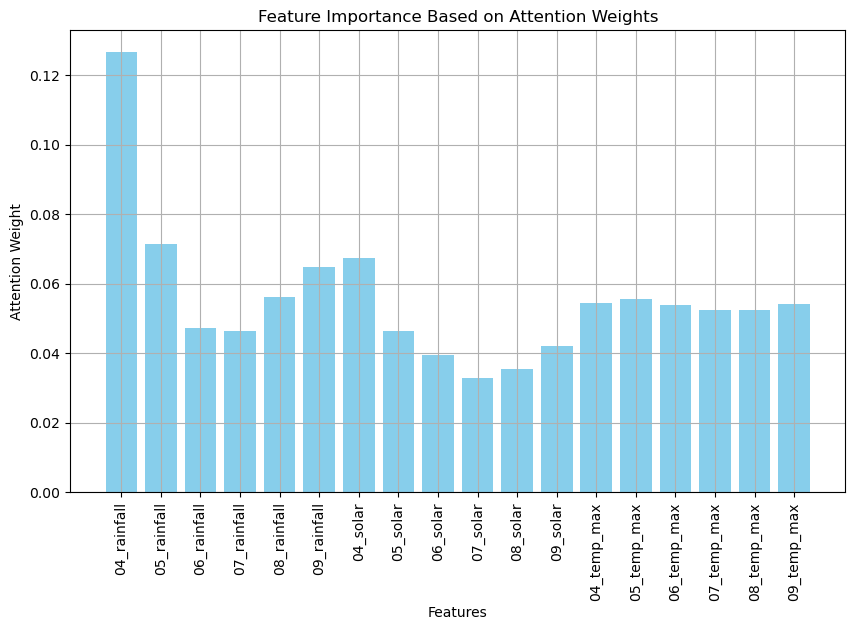

In [ ]:
feature_importance = np.mean(attention_weights, axis=0)
feature_importance = np.squeeze(feature_importance)  

# Plot the feature importance with feature names
plt.figure(figsize=(10, 6))
plt.bar(column_names, feature_importance, color='skyblue')
plt.title('Feature Importance Based on Attention Weights')
plt.xlabel('Features')
plt.ylabel('Attention Weight')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()


In [32]:
print("Attention Weights:")
print(attention_weights)

Attention Weights:
[[[0.08586089]
  [0.08603115]
  [0.08603115]
  ...
  [0.05473713]
  [0.05495839]
  [0.05742206]]

 [[0.0768439 ]
  [0.0746401 ]
  [0.03423241]
  ...
  [0.04815036]
  [0.04794459]
  [0.04919777]]

 [[0.07773729]
  [0.01589566]
  [0.01286916]
  ...
  [0.05771017]
  [0.0576546 ]
  [0.05999467]]

 ...

 [[0.0768439 ]
  [0.0746401 ]
  [0.03423241]
  ...
  [0.04815036]
  [0.04794459]
  [0.04919777]]

 [[0.23661047]
  [0.04184028]
  [0.04127194]
  ...
  [0.04827731]
  [0.04845821]
  [0.05002775]]

 [[0.12885304]
  [0.04213222]
  [0.04166713]
  ...
  [0.05954203]
  [0.05908095]
  [0.06039903]]]
